In [107]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
plt.style.use('seaborn')
sns.set(style="white")

In [108]:
kc_train = pd.read_csv("kc_house_data_train.csv")
kc_train

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,...,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,...,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,...,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,...,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


In [109]:
# turn zipcode into into onehot encoding - easier than binning by lat/long
kc_train = pd.concat([kc_train,pd.get_dummies(kc_train["zipcode"],drop_first=True)],axis=1)
kc_train = kc_train.drop(["zipcode"],axis=1)

In [110]:
# drop the original index column and id because using id as index is
# annoying for scaling
#kc_train.set_index("id",inplace=True)
kc_train.drop("Unnamed: 0",axis=1,inplace=True)
kc_train.drop("id",axis=1,inplace=True)

In [111]:
# can't use datetime form so we convert to timestamp
kc_train["date"] = pd.to_datetime(kc_train.date).apply(lambda x: x.timestamp())

In [112]:
kc_train

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,1.412554e+09,365000.0,4,2.25,2070,8893,2.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,1.408579e+09,865000.0,5,3.00,2900,6730,1.0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
2,1.408061e+09,1038000.0,4,2.50,3770,10893,2.0,0,2,3,...,0,0,0,0,0,0,0,0,0,0
3,1.427760e+09,1490000.0,3,3.50,4560,14608,2.0,0,2,3,...,0,0,0,0,0,0,0,0,0,0
4,1.405296e+09,711000.0,3,2.50,2550,5376,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,1.425341e+09,750000.0,5,2.50,3240,9960,1.0,0,1,3,...,0,0,0,0,0,0,0,0,0,0
17286,1.400544e+09,440000.0,2,1.75,1300,4000,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
17287,1.400026e+09,310000.0,3,1.00,1050,9876,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
17288,1.417651e+09,427500.0,3,1.50,1900,43186,1.5,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [113]:
# removing price so we can plug it into the splitter
target = kc_train["price"]
kc_feat = kc_train.drop("price", axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(kc_feat, target, random_state=34,test_size=0.2)

In [114]:
# scale the data to compare coef strength etc
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(x_train)

#transform the x data
x_train_s = pd.DataFrame(data=scaler.transform(x_train), columns=x_train.columns)
x_test_s = pd.DataFrame(data=scaler.transform(x_test), columns=x_test.columns)

# for some reason transforming the data removes the index so we
# need to reset and drop it for y
y_train_noindex = y_train.reset_index().drop("index",axis=1)
full_train=pd.concat([y_train_noindex,x_train_s],axis=1)


# ols make the basic model 
from statsmodels.formula.api import ols
full_train.columns = map(lambda x: "x" + str(x) if type(x)==int else x, full_train.columns)
colnames = "+".join(filter(lambda x: x not in ["price",
                                               #"lat","long"
                                              ], full_train.columns))
olsstr="price~"+colnames
#print(full_train.columns)
#olsstr="price~x98002"
print(olsstr)

lr_model = ols(formula=olsstr, data=full_train).fit()

price~date+bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+lat+long+sqft_living15+sqft_lot15+x98002+x98003+x98004+x98005+x98006+x98007+x98008+x98010+x98011+x98014+x98019+x98022+x98023+x98024+x98027+x98028+x98029+x98030+x98031+x98032+x98033+x98034+x98038+x98039+x98040+x98042+x98045+x98052+x98053+x98055+x98056+x98058+x98059+x98065+x98070+x98072+x98074+x98075+x98077+x98092+x98102+x98103+x98105+x98106+x98107+x98108+x98109+x98112+x98115+x98116+x98117+x98118+x98119+x98122+x98125+x98126+x98133+x98136+x98144+x98146+x98148+x98155+x98166+x98168+x98177+x98178+x98188+x98198+x98199


len(full_train)

In [115]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     673.4
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:12:32   Log-Likelihood:            -1.8563e+05
No. Observations:               13832   AIC:                         3.714e+05
Df Residuals:                   13745   BIC:                         3.721e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.412e+05   1390.056    389.341      0.000    5.38e+05    5.44e+05
date           1.306e+04   1400.777      9.324      0.000    1.03e+04    1.58e+04
bedrooms      -2.509e+04   1780.571    -14.091      0.000   -2.86e+04   -2.16e+04
bathrooms      1.683e+04   2561.460      6.571      0.000    1.18e+04    2.19e+04
sqft_living    9.367e+04   1644.471     56.959      0.000    9.04e+04    9.69e+04
sqft_lot       1.066e+04   1984.406      5.373      0.000    6772.849    1.46e+04
floors         -2.42e+04   2151.849    -11.246      0.000   -2.84e+04      -2e+04
waterfront     5.813e+04   1554.875     37.384      0.000    5.51e+04    6.12e+04
view           4.148e+04   1710.268     24.256      0.000    3.81e+04    4.48e+04
condition      1.737e+04   1592.502     10.905      0.000    1.42e+04    2.05e+04
grade          6.693e+04   2726.952     24.542      0.000    6.16e+04    7.23e+04
sqft_above     9.578e+04   1794.306     53.380      0.000    9.23e+04    9.93e+04
sqft_basement  1.529e+04   1616.260      9.461      0.000    1.21e+04    1.85e+04
yr_built      -2.171e+04   2408.949     -9.010      0.000   -2.64e+04    -1.7e+04
yr_renovated   5538.3304   1502.293      3.687      0.000    2593.632    8483.029
lat            3.138e+04   1.11e+04      2.826      0.005    9615.321    5.31e+04
long          -2.299e+04   8130.480     -2.827      0.005   -3.89e+04   -7048.544
sqft_living15  4809.6716   2518.708      1.910      0.056    -127.339    9746.682
sqft_lot15    -1263.5287   2080.390     -0.607      0.544   -5341.378    2814.320
x98002         3303.2584   1751.414      1.886      0.059    -129.752    6736.269
x98003        -3578.6830   1869.943     -1.914      0.056   -7244.026      86.660
x98004         8.765e+04   3476.478     25.213      0.000    8.08e+04    9.45e+04
x98005         2.101e+04   2912.489      7.214      0.000    1.53e+04    2.67e+04
x98006         3.292e+04   3889.682      8.463      0.000    2.53e+04    4.05e+04
x98007         1.643e+04   2703.129      6.077      0.000    1.11e+04    2.17e+04
x98008         2.206e+04   3516.982      6.273      0.000    1.52e+04     2.9e+04
x98010         6846.2412   1882.746      3.636      0.000    3155.803    1.05e+04
x98011         3111.7980   3975.032      0.783      0.434   -4679.808    1.09e+04
x98014         6441.2748   3356.651      1.919      0.055    -138.220     1.3e+04
x98019         3143.0809   3898.728      0.806      0.420   -4498.958    1.08e+04
x98022         4584.6612   2538.168      1.806      0.071    -390.495    9559.818
x98023        -8231.9527   2287.206     -3.599      0.000   -1.27e+04   -3748.716
x98024         8709.4796   2409.821      3.614      0.000    3985.901    1.34e+04
x98027         2.114e+04   3756.057      5.629      0.000    1.38e+04    2.85e+04
x98028         2742.5432   4401.313      0.623   

In [116]:
colnames

'date+bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+lat+long+sqft_living15+sqft_lot15+x98002+x98003+x98004+x98005+x98006+x98007+x98008+x98010+x98011+x98014+x98019+x98022+x98023+x98024+x98027+x98028+x98029+x98030+x98031+x98032+x98033+x98034+x98038+x98039+x98040+x98042+x98045+x98052+x98053+x98055+x98056+x98058+x98059+x98065+x98070+x98072+x98074+x98075+x98077+x98092+x98102+x98103+x98105+x98106+x98107+x98108+x98109+x98112+x98115+x98116+x98117+x98118+x98119+x98122+x98125+x98126+x98133+x98136+x98144+x98146+x98148+x98155+x98166+x98168+x98177+x98178+x98188+x98198+x98199'

In [117]:
full_train_features = full_train.drop('price', axis =1)

In [118]:
full_train_features

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,x98146,x98148,x98155,x98166,x98168,x98177,x98178,x98188,x98198,x98199
0,1.308912,1.715692,0.498910,0.343438,-0.254085,0.944130,-0.089943,-0.311039,-0.626650,-0.559348,...,-0.121432,-0.055188,-0.144002,-0.114177,-0.111549,-0.115791,-0.109877,-0.079097,-0.113526,-0.126542
1,1.414981,-0.394990,-0.473051,0.115290,-0.218458,0.016761,-0.089943,-0.311039,0.910199,-0.559348,...,-0.121432,-0.055188,-0.144002,-0.114177,-0.111549,-0.115791,-0.109877,-0.079097,-0.113526,-0.126542
2,-1.351662,-0.394990,-0.797038,-0.677793,-0.241199,-0.910607,-0.089943,-0.311039,-0.626650,-0.559348,...,-0.121432,-0.055188,-0.144002,-0.114177,-0.111549,-0.115791,-0.109877,-0.079097,-0.113526,-0.126542
3,-1.104167,0.660351,-0.473051,-0.601744,0.057845,0.016761,-0.089943,-0.311039,-0.626650,-0.559348,...,-0.121432,-0.055188,-0.144002,-0.114177,-0.111549,-0.115791,-0.109877,-0.079097,-0.113526,-0.126542
4,0.301253,-1.450331,-1.445012,-1.231865,-0.252569,0.016761,-0.089943,-0.311039,-0.626650,-0.559348,...,-0.121432,-0.055188,-0.144002,-0.114177,-0.111549,-0.115791,-0.109877,-0.079097,-0.113526,-0.126542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13827,1.229360,-0.394990,0.498910,-0.372510,-0.225541,0.944130,-0.089943,-0.311039,-0.626650,0.288067,...,-0.121432,-0.055188,-0.144002,-0.114177,-0.111549,-0.115791,-0.109877,-0.079097,-0.113526,-0.126542
13828,-0.184899,0.660351,0.174923,0.419487,-0.175819,-0.910607,-0.089943,-0.311039,-0.626650,0.288067,...,-0.121432,-0.055188,-0.144002,-0.114177,-0.111549,-0.115791,-0.109877,-0.079097,-0.113526,-0.126542
13829,1.370786,-0.394990,-1.445012,-0.905940,-0.191050,-0.910607,-0.089943,-0.311039,-0.626650,-0.559348,...,-0.121432,-0.055188,-0.144002,-0.114177,-0.111549,-0.115791,-0.109877,-0.079097,-0.113526,-0.126542
13830,-1.342823,0.660351,-0.473051,1.451581,-0.190032,-0.910607,-0.089943,3.514352,2.447048,0.288067,...,-0.121432,-0.055188,-0.144002,-0.114177,-0.111549,-0.115791,-0.109877,-0.079097,-0.113526,-0.126542


In [119]:
x_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
17156,1.427328e+09,5,2.50,2400,4496,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
6138,1.428365e+09,3,1.75,2190,6000,1.5,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
6736,1.401322e+09,3,1.50,1460,5040,1.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
4449,1.403741e+09,4,1.75,1530,17664,1.5,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
3305,1.417478e+09,2,1.00,950,4560,1.5,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,1.426550e+09,3,2.50,1741,5701,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
3157,1.412726e+09,4,2.25,2470,7800,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
10730,1.427933e+09,3,1.00,1250,7157,1.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
5242,1.401408e+09,4,1.75,3420,7200,1.0,0,3,5,8,...,0,0,0,0,0,0,0,0,0,0


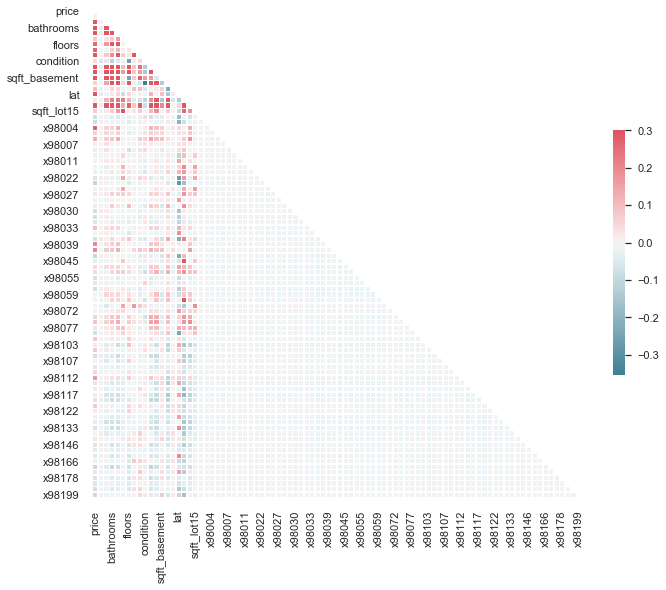

In [120]:
# look at the corr matrix

train_corr = full_train.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(train_corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

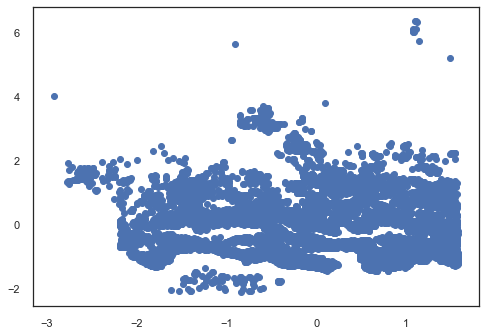

In [121]:
#plt.scatter(x_train["lat"],x_train["long"])
plt.scatter(full_train["lat"],full_train["long"])

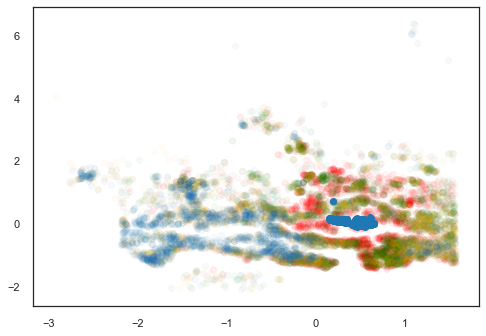

In [122]:
# taking a look at where the different quantiles land on the map,
# and plotting a specific zipcode over it
above75=full_train[full_train["price"]>full_train["price"].quantile(.75)]
above50=full_train[(full_train["price"]<=full_train["price"].quantile(.75))&(full_train["price"]>full_train["price"].quantile(.5))]
above25=full_train[(full_train["price"]<=full_train["price"].quantile(.5))&(full_train["price"]>full_train["price"].quantile(.25))]
below25=full_train[full_train["price"]<=full_train["price"].quantile(.25)]
plt.scatter(above75["lat"],above75["long"],color="red",alpha=.03)
plt.scatter(above50["lat"],above50["long"],color="green",alpha=.03)
plt.scatter(above25["lat"],above25["long"],color="orange",alpha=.03)
plt.scatter(below25["lat"],below25["long"],color="tab:blue",alpha=.03)

azip=full_train[full_train["x98004"]==full_train["x98004"].max()]
#plt.scatter(full_train["lat"],full_train["long"],color="red",alpha=.01)
plt.scatter(azip["lat"],azip["long"],color="tab:blue",alpha=1)

In [143]:
x_train.columns = map(lambda x: "x" + str(x) if type(x)==int else x, x_train.columns)

In [144]:
x_train.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'x98002', 'x98003', 'x98004', 'x98005',
       'x98006', 'x98007', 'x98008', 'x98010', 'x98011', 'x98014', 'x98019',
       'x98022', 'x98023', 'x98024', 'x98027', 'x98028', 'x98029', 'x98030',
       'x98031', 'x98032', 'x98033', 'x98034', 'x98038', 'x98039', 'x98040',
       'x98042', 'x98045', 'x98052', 'x98053', 'x98055', 'x98056', 'x98058',
       'x98059', 'x98065', 'x98070', 'x98072', 'x98074', 'x98075', 'x98077',
       'x98092', 'x98102', 'x98103', 'x98105', 'x98106', 'x98107', 'x98108',
       'x98109', 'x98112', 'x98115', 'x98116', 'x98117', 'x98118', 'x98119',
       'x98122', 'x98125', 'x98126', 'x98133', 'x98136', 'x98144', 'x98146',
       'x98148', 'x98155', 'x98166', 'x98168', 'x98177', 'x98178', 'x98188',
       'x98198', 'x9

In [125]:
x_train.date

17156    1.427328e+09
6138     1.428365e+09
6736     1.401322e+09
4449     1.403741e+09
3305     1.417478e+09
             ...     
16708    1.426550e+09
3157     1.412726e+09
10730    1.427933e+09
5242     1.401408e+09
11681    1.412640e+09
Name: date, Length: 13832, dtype: float64

In [126]:
a = 0
for column in x_train.columns:
    a = 0
    a = x_train[column].isin([0]).sum()
    if a == 13832:
        print(f'Drop {column}!')

In [127]:
x_train.bedrooms.isin([0]).sum()

11

In [129]:
x_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
17156,1.427328e+09,5,2.50,2400,4496,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
6138,1.428365e+09,3,1.75,2190,6000,1.5,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
6736,1.401322e+09,3,1.50,1460,5040,1.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
4449,1.403741e+09,4,1.75,1530,17664,1.5,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
3305,1.417478e+09,2,1.00,950,4560,1.5,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,1.426550e+09,3,2.50,1741,5701,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
3157,1.412726e+09,4,2.25,2470,7800,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
10730,1.427933e+09,3,1.00,1250,7157,1.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
5242,1.401408e+09,4,1.75,3420,7200,1.0,0,3,5,8,...,0,0,0,0,0,0,0,0,0,0


In [130]:
x_train.columns

Index([         'date',      'bedrooms',     'bathrooms',   'sqft_living',
            'sqft_lot',        'floors',    'waterfront',          'view',
           'condition',         'grade',    'sqft_above', 'sqft_basement',
            'yr_built',  'yr_renovated',           'lat',          'long',
       'sqft_living15',    'sqft_lot15',           98002,           98003,
                 98004,           98005,           98006,           98007,
                 98008,           98010,           98011,           98014,
                 98019,           98022,           98023,           98024,
                 98027,           98028,           98029,           98030,
                 98031,           98032,           98033,           98034,
                 98038,           98039,           98040,           98042,
                 98045,           98052,           98053,           98055,
                 98056,           98058,           98059,           98065,
                 98070,  

In [140]:
x_train = x_train.sort_index()

In [141]:
x_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,1.412554e+09,4,2.25,2070,8893,2.0,0,0,4,8,...,0,0,0,0,0,0,0,0,0,0
1,1.408579e+09,5,3.00,2900,6730,1.0,0,0,5,8,...,0,0,0,0,0,0,0,0,0,0
2,1.408061e+09,4,2.50,3770,10893,2.0,0,2,3,11,...,0,0,0,0,0,0,0,0,0,0
3,1.427760e+09,3,3.50,4560,14608,2.0,0,2,3,12,...,0,0,0,0,0,0,0,0,0,0
5,1.409098e+09,4,2.00,1710,8288,1.5,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17283,1.418602e+09,3,1.50,1680,17409,1.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
17284,1.401840e+09,3,2.50,2070,12708,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
17285,1.425341e+09,5,2.50,3240,9960,1.0,0,1,3,8,...,0,0,0,0,0,0,0,0,0,0
17287,1.400026e+09,3,1.00,1050,9876,1.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0


In [145]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(x_train)
poly2_columns = poly_2.get_feature_names(x_train.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,x98178^2,x98178 x98188,x98178 x98198,x98178 x98199,x98188^2,x98188 x98198,x98188 x98199,x98198^2,x98198 x98199,x98199^2
0,1.412554e+09,4.0,2.25,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.408579e+09,5.0,3.00,2900.0,6730.0,1.0,0.0,0.0,5.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.408061e+09,4.0,2.50,3770.0,10893.0,2.0,0.0,2.0,3.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.427760e+09,3.0,3.50,4560.0,14608.0,2.0,0.0,2.0,3.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.409098e+09,4.0,2.00,1710.0,8288.0,1.5,0.0,0.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
new_columns = []
for column in df_poly2.columns:
    a = 0
    a = df_poly2[column].isin([0]).sum()
    if a != 13832:
        new_columns.append(column)

In [152]:
df_cleanpoly2 = df_poly2[new_columns]

In [153]:
df_cleanpoly2

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,x98146^2,x98148^2,x98155^2,x98166^2,x98168^2,x98177^2,x98178^2,x98188^2,x98198^2,x98199^2
0,1.412554e+09,4.0,2.25,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.408579e+09,5.0,3.00,2900.0,6730.0,1.0,0.0,0.0,5.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.408061e+09,4.0,2.50,3770.0,10893.0,2.0,0.0,2.0,3.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.427760e+09,3.0,3.50,4560.0,14608.0,2.0,0.0,2.0,3.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.409098e+09,4.0,2.00,1710.0,8288.0,1.5,0.0,0.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13827,1.418602e+09,3.0,1.50,1680.0,17409.0,1.0,0.0,0.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13828,1.401840e+09,3.0,2.50,2070.0,12708.0,2.0,0.0,0.0,3.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13829,1.425341e+09,5.0,2.50,3240.0,9960.0,1.0,0.0,1.0,3.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13830,1.400026e+09,3.0,1.00,1050.0,9876.0,1.0,0.0,0.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, full_train.price, random_state=9,test_size=0.2)

In [40]:
scaler2 = StandardScaler()

In [41]:
scaler2.fit(df_poly2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_poly2.columns)

In [43]:
lm_2 = LinearRegression()
lm_2 = lm_2.fit(X_train, y_train)

In [45]:
y_train_pred = lm_2.predict(X_train)


In [47]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

In [48]:
print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 90436.60625085351


In [154]:
poly_3 = PolynomialFeatures(degree=3, include_bias=False)
poly3_data = poly_3.fit_transform(x_train)
poly3_columns = poly_3.get_feature_names(x_train.columns)
df_poly3 = pd.DataFrame(poly3_data, columns=poly3_columns)

In [155]:
df_poly3.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,x98188^3,x98188^2 x98198,x98188^2 x98199,x98188 x98198^2,x98188 x98198 x98199,x98188 x98199^2,x98198^3,x98198^2 x98199,x98198 x98199^2,x98199^3
0,1.412554e+09,4.0,2.25,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.408579e+09,5.0,3.00,2900.0,6730.0,1.0,0.0,0.0,5.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.408061e+09,4.0,2.50,3770.0,10893.0,2.0,0.0,2.0,3.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.427760e+09,3.0,3.50,4560.0,14608.0,2.0,0.0,2.0,3.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.409098e+09,4.0,2.00,1710.0,8288.0,1.5,0.0,0.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
new_columns2 = []
for column in df_poly3.columns:
    a = 0
    a = df_poly3[column].isin([0]).sum()
    if a != 13832:
        new_columns2.append(column)

In [157]:
df_cleanpoly3 = df_poly3[new_columns2]

In [158]:
df_cleanpoly3

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,x98146^3,x98148^3,x98155^3,x98166^3,x98168^3,x98177^3,x98178^3,x98188^3,x98198^3,x98199^3
0,1.412554e+09,4.0,2.25,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.408579e+09,5.0,3.00,2900.0,6730.0,1.0,0.0,0.0,5.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.408061e+09,4.0,2.50,3770.0,10893.0,2.0,0.0,2.0,3.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.427760e+09,3.0,3.50,4560.0,14608.0,2.0,0.0,2.0,3.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.409098e+09,4.0,2.00,1710.0,8288.0,1.5,0.0,0.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13827,1.418602e+09,3.0,1.50,1680.0,17409.0,1.0,0.0,0.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13828,1.401840e+09,3.0,2.50,2070.0,12708.0,2.0,0.0,0.0,3.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13829,1.425341e+09,5.0,2.50,3240.0,9960.0,1.0,0.0,1.0,3.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13830,1.400026e+09,3.0,1.00,1050.0,9876.0,1.0,0.0,0.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
lm_3 = LinearRegression()
lm_3 = lm_3.fit(df_cleanpoly2, full_train.price)

In [53]:
fulltrainpoly3_price_pred = lm_3.predict(full_train_features)


In [54]:
fulltrainpoly3_rmse = np.sqrt(metrics.mean_squared_error(full_train.price, fulltrainpoly3_price_pred))

In [55]:
print('Training Root Mean Squared Error:' , fulltrainpoly3_rmse)

Training Root Mean Squared Error: 167486.20619350558


In [159]:
from sklearn.feature_selection import RFECV

In [160]:
ols = linear_model.LinearRegression()

In [161]:
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

selector.fit(df_cleanpoly2, full_train.price)

RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=-1, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [162]:
selected_rfe = df_cleanpoly2.columns[selector.support_]
removed_rfe = df_cleanpoly2.columns[~selector.support_]

In [163]:

lm_rfe = LinearRegression()

lm_rfe = lm_rfe.fit(df_cleanpoly2[selected_rfe], full_train.price)

y_rfe = lm_rfe.predict(df_cleanpoly2[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(full_train.price, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)



Training Root Mean Squared Error: 372110.2945208282


In [165]:
df_cleanpoly2

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,x98146^2,x98148^2,x98155^2,x98166^2,x98168^2,x98177^2,x98178^2,x98188^2,x98198^2,x98199^2
0,1.412554e+09,4.0,2.25,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.408579e+09,5.0,3.00,2900.0,6730.0,1.0,0.0,0.0,5.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.408061e+09,4.0,2.50,3770.0,10893.0,2.0,0.0,2.0,3.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.427760e+09,3.0,3.50,4560.0,14608.0,2.0,0.0,2.0,3.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.409098e+09,4.0,2.00,1710.0,8288.0,1.5,0.0,0.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13827,1.418602e+09,3.0,1.50,1680.0,17409.0,1.0,0.0,0.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13828,1.401840e+09,3.0,2.50,2070.0,12708.0,2.0,0.0,0.0,3.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13829,1.425341e+09,5.0,2.50,3240.0,9960.0,1.0,0.0,1.0,3.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13830,1.400026e+09,3.0,1.00,1050.0,9876.0,1.0,0.0,0.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
